# MAKE DASHBOARD DATA
## Weather Company Data Limited Edition: Sales Prediction using The Weather Company Data

### Data Disclaimer

The weather and business input data provided in this Accelerator is simulated data, designed to illustrate how to solve a common business problem. You are not permitted to utilize the simulated data contained in the Accelerator outside of this Accelerator or the Sample Materials contained within it.

### Copyright

This project contains Sample Materials, provided under license. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2020. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp.

### Terms and Conditions

The terms under which you are licensing IBM Cloud Pak for Data also apply to your use of the Industry Accelerators. 
 
Before you use the Industry Accelerators, you must agree on these additional terms and conditions that are set forth here.
 
This information contains sample modules, exercises, and code samples (the code may be provided in source code form (“Source Code”)) (collectively “Sample Materials”).

### License
 
Subject to the terms herein, you may copy, modify, and distribute these Sample Materials within your enterprise only, for your internal use only; provided such use is within the limits of the license rights of the IBM agreement under which you are licensing IBM Cloud Pak for Data.
 
The Industry Accelerators might include applicable third-party licenses. Review the third-party licenses before you use any of the Industry Accelerators. You can find the third-party licenses that apply to each Sample Material in the notices.txt file that is included with each Sample Material.

### Code Security
 
Source Code may not be disclosed to any third parties for any reason without IBM’s prior written consent, and access must be limited to your employees who have a need to know. 
 
You have implemented and will maintain the technical and personnel focused security policies, procedures, and controls that are necessary to protect the Source Code against loss, alteration, unlawful forms of processing, unauthorized disclosure, and unauthorized access.
 
You will promptly (and in no event any later than 48 hours) notify IBM after becoming aware of any breach or other security incident that you know, or should reasonably suspect, affects or will affect the Source Code or IBM, and will provide IBM with reasonably requested information about such security incident and the status of any remediation and restoration activities.
 
You will not permit any Source Code to reside on servers located in the Russian Federation, the People’s Republic of China, or any territories worldwide in which the Russian Federation or People’s Republic of China claim sovereignty (collectively, “China or Russia”).  Company shall not permit anyone to access or use any such Source Code from or within China or Russia, and Company will not permit any development, testing, or other work to occur in China or Russia that would require such access or use.  Upon reasonable written notice, IBM may extend these restrictions to other countries that the United States government identifies as potential cyber security concerns.
IBM may request that you verify compliance with these Code Security obligations, and you agree to cooperate with IBM in that regard.

### General
 
Notwithstanding anything to the contrary, IBM PROVIDES THE SAMPLE MATERIALS ON AN "AS IS" BASIS AND IBM DISCLAIMS ALL WARRANTIES, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY IMPLIED WARRANTIES OR CONDITIONS OF MERCHANTABILITY, SATISFACTORY QUALITY, FITNESS FOR A PARTICULAR PURPOSE, TITLE, AND ANY WARRANTY OR CONDITION OF NON-INFRINGEMENT. IBM SHALL NOT BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY OR ECONOMIC CONSEQUENTIAL DAMAGES ARISING OUT OF THE USE OR OPERATION OF THE SAMPLE MATERIALS. IBM SHALL NOT BE LIABLE FOR LOSS OF, OR DAMAGE TO, DATA, OR FOR LOST PROFITS, BUSINESS REVENUE, GOODWILL, OR ANTICIPATED SAVINGS. IBM HAS NO OBLIGATION TO PROVIDE MAINTENANCE, SUPPORT, UPDATES, ENHANCEMENTS OR MODIFICATIONS TO THE SAMPLE MATERIALS.


## Introduction



This notebook computes dashboard data both to evaluate the predictive performance of models built using weather data and to explore any potential predictive relationships between the weather variables and the sales variable. Then it deploys the shiny assets in the file `sales-prediction-using-weather-company-data-dashboard.zip` to view the dashboard <br>

In the first part of the notebook :

The notebook loads unprocessed datasets (i.e., *fauxweather1.csv*, *fauxsales1.csv*, *fauxweather2.csv*, *fauxsales2.csv*) then uses the analysis specifications of a configuration file (i.e., *STEP 0.1*) to sequentially (a) transform the data into apt predictive modeling input data, (b) build then apply multiple predictive models, (c) compute datasets that tabulate some results of "build models" and "apply models" analyses in (b), and (d) save the computed datasets for a subsequent dashboard application. The datasets and configuration file have storage in the `/project_data/data_asset/` directory of the provided WML CP4D project. Likewise, all notebooks have storage in the `/project_data/notebook/` directory of the provided WML CP4D project.

In the second part we will:
- Programmatically get the ID's for the deployment space and model deployments that were created in the `build models` notebook.
- Store Shiny assets into the same deployment space.
- Deploy Shiny assets as an app and view the dashboard.

# STEP 0.1: Configure Analysis: Import Software Packages, Set Parameters, and Define Custom Functions

The following cells configure the analysis (i.e., import python software packages, set predefined variables (aka "parameters" aka "settings"), and define custom functions).

In [8]:
# ----------------------------------------------------------------------------------------------------------------------
# LOAD ANALYSIS CONFIGURATION
# ----------------------------------------------------------------------------------------------------------------------

# import "sys" library
import sys

# add project data path
if "/project_data/data_asset" not in sys.path:
    sys.path.insert(0, "/project_data/data_asset")

    
# import configuration information
from config import *

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# define data files
loadfile1 = "/project_data/data_asset/fauxsales1.csv"
loadfile2 = "/project_data/data_asset/fauxweather1.csv"
loadfile3 = "/project_data/data_asset/fauxsales2.csv"
loadfile4 = "/project_data/data_asset/fauxweather2.csv"

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 0.1: Configure Analysis' analysis")
    

DONE: 'STEP 0.1: Configure Analysis' analysis


# STEP 1.1: Evaluate Data
Ideally and Prospectively, this substep simply computes statistics (typically descriptive stats) including analytics-focused or/and business-focused "quality metrics" of the data variables (columns).

In [9]:

# ----------------------------------------------------------------------------------------------------------------------
# ACTUAL
# ----------------------------------------------------------------------------------------------------------------------

#
list_loadfile = [loadfile1, loadfile2, loadfile3, loadfile4]

#
for loadfilenow in list_loadfile:
    
    # load data
#     df = pd.read_csv(loadfilenow, dtype=dict_dtypes, parse_dates=[name_columndatetime])
    df = pd.read_csv(loadfilenow)
    
    # compute columnar quality metrics (e.g., nunique, isnan, dtype, min, max, kurtosis): merged client data
    mydfdescribe(df)


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.1: Evaluate Data' analysis")


dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative                min                max   kurtosis
date         int64    731      2193   0.0          0.0            0.000000      0.0               20160101           20171231          -1.982886 
dateandtime  object   731      2193   0.0          0.0            0.000000     NaN                20160101 00:00:00  20171231 00:00:00 NaN       
placeId      int64    3        2193   0.0          0.0            0.000000      0.0               78152              96468             -1.500685 
placeName    object   3        2193   0.0          0.0            0.000000     NaN                place_078152       place_096468      NaN       
postalcode   int64    3        2193   0.0          0.0            0.000000      0.0               65807              84123             -1.500685 
countrycode  object   1        2193   0.0          0.0            0.000000     NaN                us                 us                NaN       
productname  object   1        2193   0.0          0.0            0.000000     NaN                thingamajig        thingamajig       NaN       
producttype  object   1        2193   0.0          0.0            0.000000     NaN                categoryA          categoryA         NaN       
discount     float64  3        2193   0.0          0.0            0.339717      0.0               0                  0.2               -1.517852 
closed       bool     2        2193   0.0          0.0            0.989056      0.0               False              True               86.586088
sales        float64  2031     2193   0.0          0.0            0.073871      0.0               0                  33144.2            2.769503

dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative           min           max     kurtosis
DewpointLocalAfternoonAvg          float64  1453     2193   0.0          0.0            0.0           0.011400         -1.563751e+01  7.292249e+01 -0.315214   
DewpointLocalAfternoonMax          float64  397      2193   0.0          0.0            0.0           0.006384         -1.246042e+01  7.411958e+01 -0.365741   
DewpointLocalAfternoonMin          float64  403      2193   0.0          0.0            0.0           0.002280         -1.058652e+01  8.157348e+01 -0.264868   
DewpointLocalDayAvg                float64  1993     2193   0.0          0.0            0.0           0.001368         -2.442216e+00  8.548094e+01 -0.309612   
DewpointLocalDayMax                float64  387      2193   0.0          0.0            0.0           0.004560         -1.381763e+01  7.276237e+01 -0.458122   
DewpointLocalDayMin                float64  419      2193   0.0          0.0            0.0           0.042408         -3.143862e+01  6.918138e+01 -0.122416   
DewpointLocalDaytimeAvg            float64  1772     2193   0.0          0.0            0.0           0.025536         -2.026114e+01  6.741385e+01 -0.331288   
DewpointLocalDaytimeMax            float64  386      2193   0.0          0.0            0.0           0.000912         -4.058771e+00  8.252123e+01 -0.418973   
DewpointLocalDaytimeMin            float64  416      2193   0.0          0.0            0.0           0.152759         -3.743458e+01  5.706542e+01 -0.210670   
DewpointLocalEveningAvg            float64  1469     2193   0.0          0.0            0.0           0.029184         -3.168687e+01  6.812313e+01 -0.255538   
DewpointLocalEveningMax            float64  408      2193   0.0          0.0            0.0           0.008664         -2.326266e+01  7.519734e+01 -0.292875   
DewpointLocalEveningMin            float64  416      2193   0.0          0.0            0.0           0.034200         -3.305257e+01  6.846743e+01 -0.218170   
DewpointLocalMorningAvg            float64  1455     2193   0.0          0.0            0.0           0.012312         -1.781504e+01  7.320496e+01 -0.350819   
DewpointLocalMorningMax            float64  396      2193   0.0          0.0            0.0           0.000912         -3.653143e+00  8.616686e+01 -0.409828   
DewpointLocalMorningMin            float64  410      2193   0.0          0.0            0.0           0.110807         -3.566199e+01  5.937801e+01 -0.289619   
DewpointLocalNighttimeAvg          float64  1811     2193   0.0          0.0            0.0           0.000912         -1.348704e+01  8.741795e+01 -0.269628   
DewpointLocalNighttimeMax          float64  397      2193   0.0          0.0            0.0           0.014136         -2.719290e+01  7.126710e+01 -0.297656   
DewpointLocalNighttimeMin          float64  408      2193   0.0          0.0            0.0           0.010032         -2.543273e+01  7.644727e+01 -0.222983   
DewpointLocalOvernightAvg          float64  1495     2193   0.0          0.0            0.0           0.011400         -2.643458e+01  7.556541e+01 -0.294883   
DewpointLocalOvernightMax          float64  397      2193   0.0          0.0            0.0           0.003648         -2.133171e+01  7.982829e+01 -0.313792   
DewpointLocalOvernightMin          float64  408      2193   0.0          0.0            0.0           0.042408         -3.537960e+01  6.704040e+01 -0.286934   
FeelsLikeLocalAfternoonAvg         float64  1637     2193   0.0          0.0            0.0           0.016416         -2.432087e+01  9.999912e+01 -0.653506   
FeelsLikeLocalAfternoonMax         float64  522      2193   0.0          0.0            0.0           0.010032         -2.113844e+01  1.025216e+02 -0.629623   
FeelsLikeLocalAfternoonMin         float64  537      2193   0.0          0.0            0.0           0.013224         -2.560682e+01  1.054332e+02 -0.665246   
FeelsLikeLocalDayAvg               f

dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative                min                max   kurtosis
date         int64    365      1095   0.0          0.0            0.000000      0.0               20180101           20181231          -1.205738 
dateandtime  object   365      1095   0.0          0.0            0.000000     NaN                20180101 00:00:00  20181231 00:00:00 NaN       
placeId      int64    3        1095   0.0          0.0            0.000000      0.0               78152              96468             -1.501372 
placeName    object   3        1095   0.0          0.0            0.000000     NaN                place_078152       place_096468      NaN       
postalcode   int64    3        1095   0.0          0.0            0.000000      0.0               65807              84123             -1.501372 
countrycode  object   1        1095   0.0          0.0            0.000000     NaN                us                 us                NaN       
productname  object   1        1095   0.0          0.0            0.000000     NaN                thingamajig        thingamajig       NaN       
producttype  object   1        1095   0.0          0.0            0.000000     NaN                categoryA          categoryA         NaN       
discount     float64  3        1095   0.0          0.0            0.345205      0.0               0                  0.2               -1.509960 
closed       bool     2        1095   0.0          0.0            0.989041      0.0               False              True               86.661765
sales        float64  1006     1095   0.0          0.0            0.082192      0.0               0                  33852.4            2.152083

dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative           min           max     kurtosis
DewpointLocalAfternoonAvg          float64  867      1095   0.0          0.0            0.0           0.018265         -8.467496e+00  7.097248e+01 -0.413353   
DewpointLocalAfternoonMax          float64  351      1095   0.0          0.0            0.0           0.014612         -6.880418e+00  7.159958e+01 -0.444572   
DewpointLocalAfternoonMin          float64  356      1095   0.0          0.0            0.0           0.001826         -2.126523e+00  8.031348e+01 -0.372661   
DewpointLocalDayAvg                float64  1048     1095   0.0          0.0            0.0           0.000000          4.338456e+00  8.290842e+01 -0.479807   
DewpointLocalDayMax                float64  337      1095   0.0          0.0            0.0           0.001826         -5.717628e+00  7.096237e+01 -0.673239   
DewpointLocalDayMin                float64  363      1095   0.0          0.0            0.0           0.049315         -2.351862e+01  6.738138e+01 -0.306662   
DewpointLocalDaytimeAvg            float64  984      1095   0.0          0.0            0.0           0.029224         -1.258114e+01  6.457887e+01 -0.465803   
DewpointLocalDaytimeMax            float64  350      1095   0.0          0.0            0.0           0.000000          1.521229e+00  8.000123e+01 -0.598865   
DewpointLocalDaytimeMin            float64  354      1095   0.0          0.0            0.0           0.168950         -3.545458e+01  5.490542e+01 -0.337566   
DewpointLocalEveningAvg            float64  880      1095   0.0          0.0            0.0           0.031963         -1.596686e+01  6.686314e+01 -0.466390   
DewpointLocalEveningMax            float64  354      1095   0.0          0.0            0.0           0.008219         -6.522665e+00  7.375734e+01 -0.550008   
DewpointLocalEveningMin            float64  358      1095   0.0          0.0            0.0           0.035616         -1.739257e+01  6.738743e+01 -0.397831   
DewpointLocalMorningAvg            float64  867      1095   0.0          0.0            0.0           0.016438         -9.535026e+00  7.098495e+01 -0.531626   
DewpointLocalMorningMax            float64  349      1095   0.0          0.0            0.0           0.000000          5.166857e+00  8.364686e+01 -0.609167   
DewpointLocalMorningMin            float64  358      1095   0.0          0.0            0.0           0.125114         -3.368199e+01  5.703801e+01 -0.430465   
DewpointLocalNighttimeAvg          float64  980      1095   0.0          0.0            0.0           0.000000          4.179412e-01  8.539295e+01 -0.480562   
DewpointLocalNighttimeMax          float64  361      1095   0.0          0.0            0.0           0.012785         -1.045290e+01  6.982710e+01 -0.585777   
DewpointLocalNighttimeMin          float64  358      1095   0.0          0.0            0.0           0.012785         -1.751273e+01  7.428727e+01 -0.337703   
DewpointLocalOvernightAvg          float64  878      1095   0.0          0.0            0.0           0.010959         -1.434456e+01  7.277542e+01 -0.522105   
DewpointLocalOvernightMax          float64  354      1095   0.0          0.0            0.0           0.005479         -7.651706e+00  7.712829e+01 -0.556405   
DewpointLocalOvernightMin          float64  367      1095   0.0          0.0            0.0           0.075799         -2.745960e+01  6.434040e+01 -0.487017   
FeelsLikeLocalAfternoonAvg         float64  939      1095   0.0          0.0            0.0           0.012785         -2.340588e+01  9.759912e+01 -0.950121   
FeelsLikeLocalAfternoonMax         float64  442      1095   0.0          0.0            0.0           0.009132         -2.077844e+01  1.010816e+02 -0.895546   
FeelsLikeLocalAfternoonMin         float64  456      1095   0.0          0.0            0.0           0.009132         -1.858682e+01  1.007532e+02 -0.969579   
FeelsLikeLocalDayAvg               f

DONE: 'STEP 1.1: Evaluate Data' analysis


# STEP 1.2: Transform Data
Typically, this substep derives new variables from the extant ones or/and aggregates values of variables by a single variable or a combination of chosen variables.

In [10]:
# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# NOTE: For most generality, the code likely must resume a "join all the data then aggregate it" approach rather
#     : than the current "aggregate non-weather data then join weather to it" approach that exploits a presumed
#     : "compute models per location" solution (especially since weather is a location-variant dataset).

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: client data
df1a = pd.read_csv(loadfile1, dtype=dict_columnsdtypes_client, parse_dates=[name_columndatetime]).\
    rename(columns=dict_columnsrename_client, inplace=False)

df1b = pd.read_csv(loadfile3, dtype=dict_columnsdtypes_client, parse_dates=[name_columndatetime]).\
    rename(columns=dict_columnsrename_client, inplace=False)

df1 = pd.concat([df1a, df1b], axis=0, ignore_index=True)

# compute independent variables: time-based variables
# todo: brainstorm more derived (extracted) variables
df1 = derivevariables_time(df1, name_columndatetime)

# compute aggregated variables: independent variables and dependent variables
df1 = df1.groupby(list_columnsgroupby, as_index=False).agg(dict_columnsagg_agg).\
    astype(dict_columnsdtypes_agg).\
    rename(columns=dict_columnsrename_agg).\
    reset_index(inplace=False, drop=True) # TODO: combine this with previous line

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: weather data
# TODO: update the hardcoded aspects here after above update of config variables
df2a = pd.read_csv(loadfile2, dtype=dict_columnsdtypes_weather, parse_dates=["date"]).\
    rename(columns=dict_columnsrename_weather, inplace=False).\
    loc[:, ["dateW", "postalcodeW"] + list_colpick_weather]

df2b = pd.read_csv(loadfile4, dtype=dict_columnsdtypes_weather, parse_dates=["date"]).\
    rename(columns=dict_columnsrename_weather, inplace=False).\
    loc[:, ["dateW", "postalcodeW"] + list_colpick_weather]

df2 = pd.concat([df2a, df2b], axis=0, ignore_index=True)

df2["dateW"] = pd.to_datetime(df2["dateW"], format="%Y%m%d").dt.date.astype("str")

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# compute data: merge client data, weather data, and postalcode data
# TODO: drop redundant columns via the data joins
df = df1.merge(df2, left_on=["date", "postalcode"], right_on=["dateW", "postalcodeW"], how=valu_howjoin)

# display data
df.head(n=valu_numrowshead)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.2: Transform Data' analysis")


date placeId producttype     placeName postalcode  minute  hour  weekday  day  month  quarter  year  discount     sales       dateW postalcodeW  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  2016-01-01  078152  categoryA   place_078152  65807      0       0     6        1    1      1        2016  0.1       0.00      2016-01-01  65807       19.294962                13.980513                 29.574154                 33.848282                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     35.408451                        90.968269                        58.350410                        0.010339               25.651545                   28.390444                   32.289480                   1.239738                8.665123                   8.255852                
1  2016-01-01  094352  categoryA   place_094352  82007      0       0     6        1    1      1        2016  0.1       0.00      2016-01-01  82007      -2.485020                -6.179487                  15.714154                 18.218306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.008451                        48.268269                        38.833743                        0.010339               14.851545                   15.610444                   20.739474                   1.156404                8.665123                   10.306436               
2  2016-01-01  096468  categoryA   place_096468  84123      0       0     6        1    1      1        2016  0.1       0.00      2016-01-01  84123      -1.825032                -5.459487                  21.294154                 21.368306                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     33.308451                        74.368269                        51.325412                        0.010339               10.891545                   10.030444                   15.249474                   1.156404                9.503822                   1.768552                
3  2016-01-02  078152  categoryA   place_078152  65807      0       0     7        2    1      1        2016  0.1       26100.46  2016-01-02  65807       20.764968                17.220513                 40.014154                 42.203270                 1.454665         0.902338             0.59834              0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.108451                        80.668269                        48.700412                        0.010339               34.651545                   31.270444                   39.114468                   1.323071                8.581911                   8.628686                
4  2016-01-02  094352  categoryA   place_094352  82007      0       0     7        2    1      1        2016  0.2       16744.62  2016-01-02  82007       2.314968                 2.640513                  27.954154                 26.948270                 1.454665         0.902338             0.59834              0.003129                 0.000235     

DONE: 'STEP 1.2: Transform Data' analysis


# STEP 1.3: Explore Data
Typically, this substep involves basic inital tabulations, histograms, correlations, time-series plots, etcetera.

Text(0.5, 1.0, 'DewpointLocalMorningAvg')

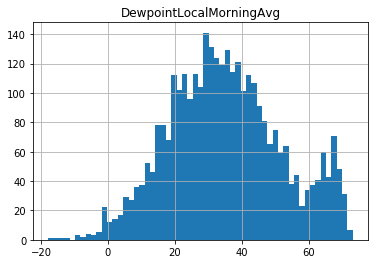

Text(0.5, 1.0, 'FeelsLikeLocalDaytimeAvg')

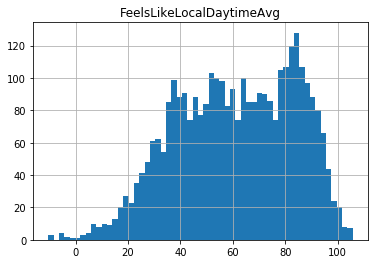

Text(0.5, 1.0, 'FeelsLikeLocalDaytimeMax')

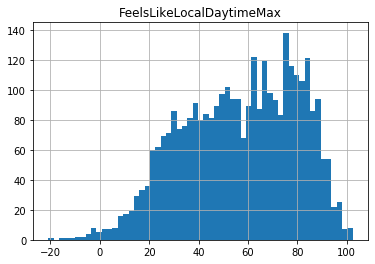

Text(0.5, 1.0, 'FeelsLikeLocalDaytimeMin')

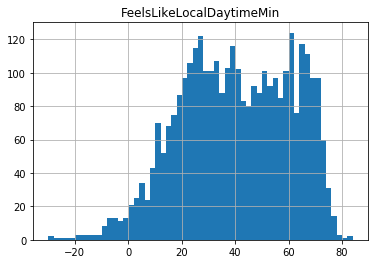

Text(0.5, 1.0, 'GustLocalDayMax')

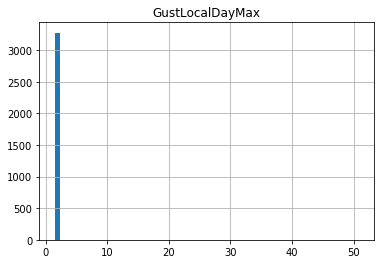

Text(0.5, 1.0, 'GustLocalDaytimeAvg')

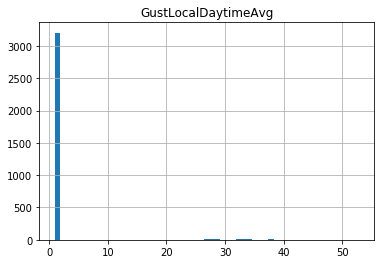

Text(0.5, 1.0, 'GustLocalMorningAvg')

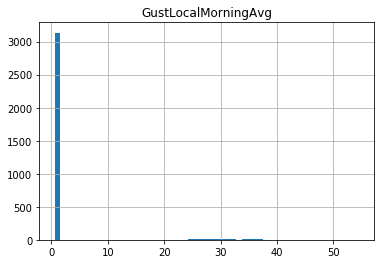

Text(0.5, 1.0, 'PrecipAmountLocalDayAvg')

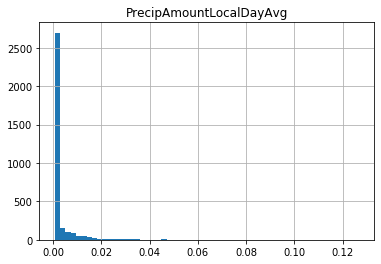

Text(0.5, 1.0, 'PrecipAmountLocalDayMax')

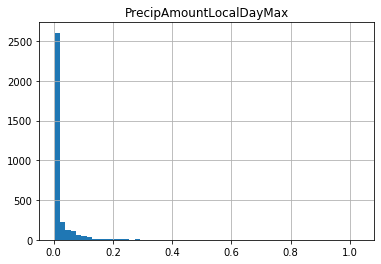

Text(0.5, 1.0, 'PrecipAmountLocalDayMin')

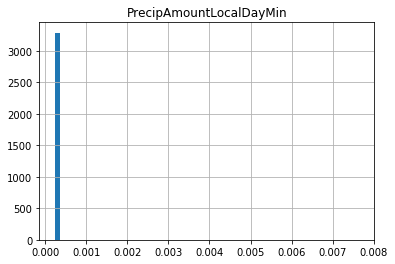

Text(0.5, 1.0, 'PrecipAmountLocalDaytimeAvg')

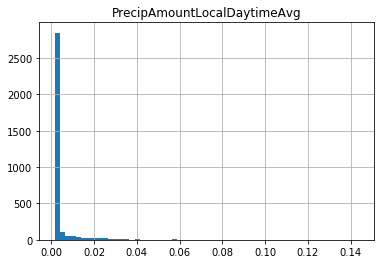

Text(0.5, 1.0, 'PrecipAmountLocalEveningAvg')

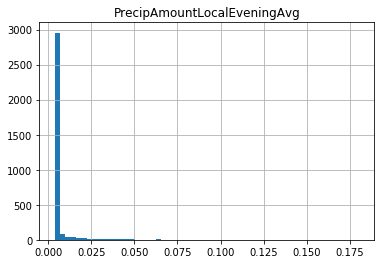

Text(0.5, 1.0, 'RelativeHumidityLocalDaytimeAvg')

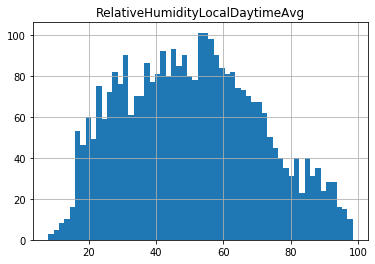

Text(0.5, 1.0, 'RelativeHumidityLocalDaytimeMax')

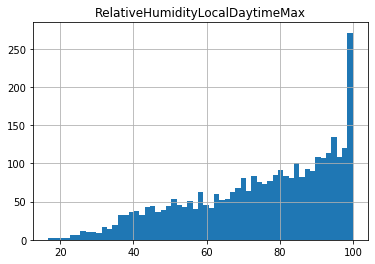

Text(0.5, 1.0, 'RelativeHumidityLocalDaytimeMin')

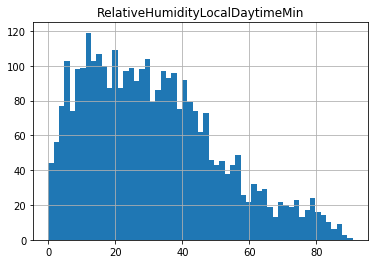

Text(0.5, 1.0, 'SnowAmountLocalDayMax')

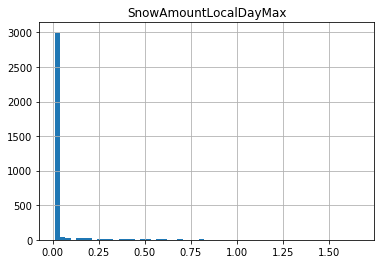

Text(0.5, 1.0, 'TemperatureLocalDaytimeAvg')

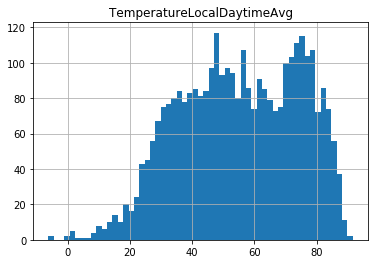

Text(0.5, 1.0, 'TemperatureLocalDaytimeMax')

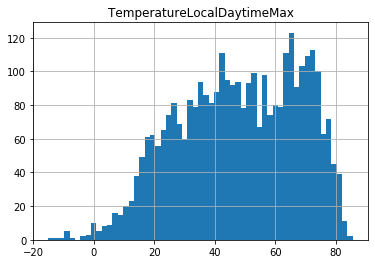

Text(0.5, 1.0, 'TemperatureLocalDaytimeMin')

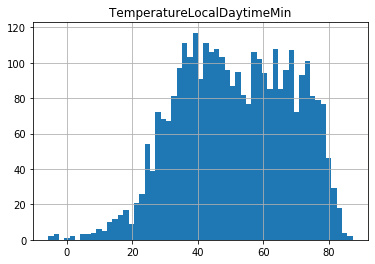

Text(0.5, 1.0, 'UVIndexLocalDaytimeAvg')

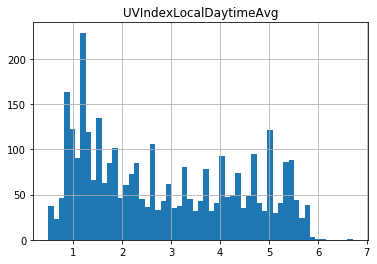

Text(0.5, 1.0, 'VisibilityLocalDaytimeAvg')

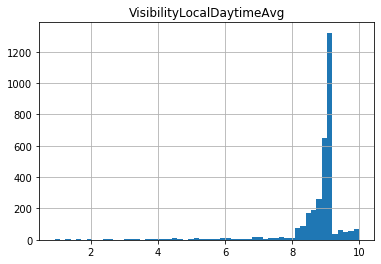

Text(0.5, 1.0, 'WindSpeedLocalDaytimeAvg')

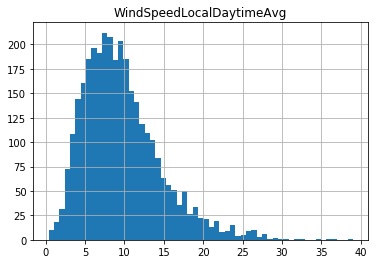

Text(0.5, 1.0, 'day')

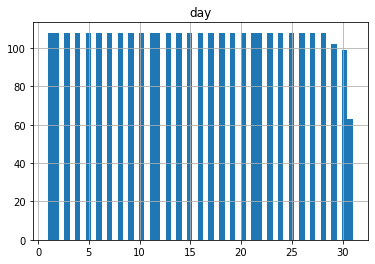

Text(0.5, 1.0, 'discount')

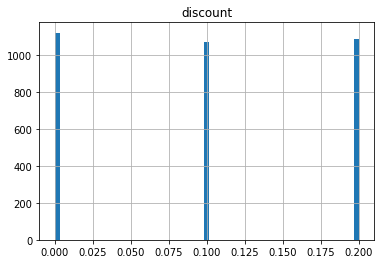

Text(0.5, 1.0, 'hour')

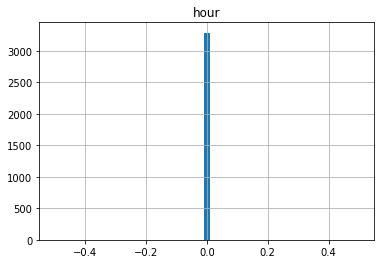

Text(0.5, 1.0, 'minute')

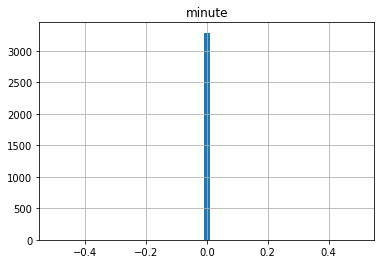

Text(0.5, 1.0, 'month')

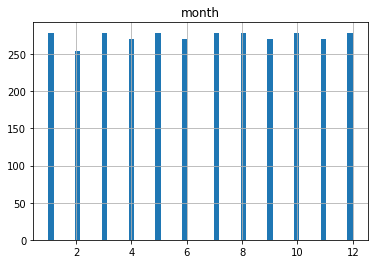

Text(0.5, 1.0, 'quarter')

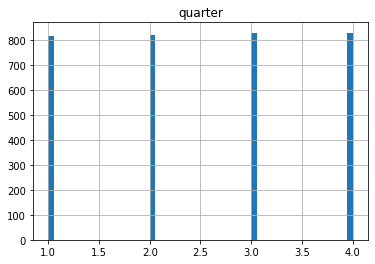

Text(0.5, 1.0, 'sales')

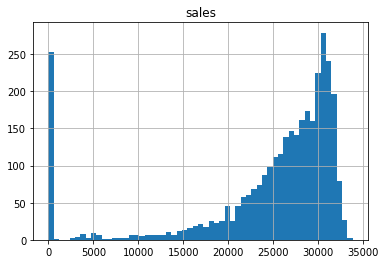

Text(0.5, 1.0, 'weekday')

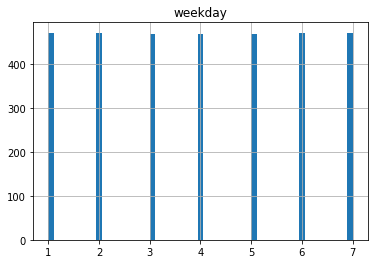

Text(0.5, 1.0, 'year')

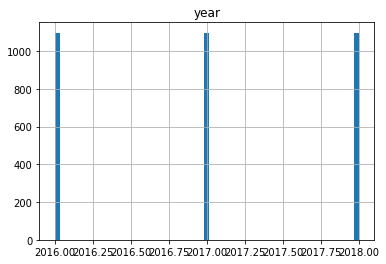

Text(0.5, 1.0, 'date')

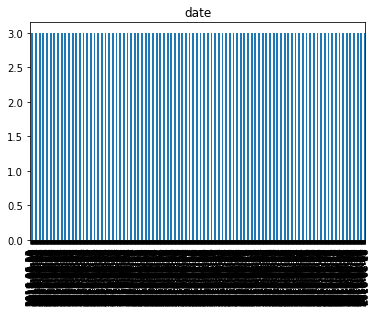

Text(0.5, 1.0, 'dateW')

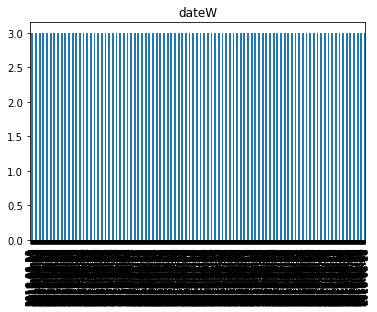

Text(0.5, 1.0, 'placeId')

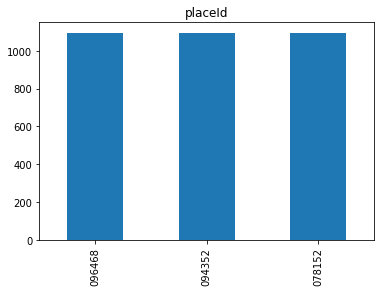

Text(0.5, 1.0, 'placeName')

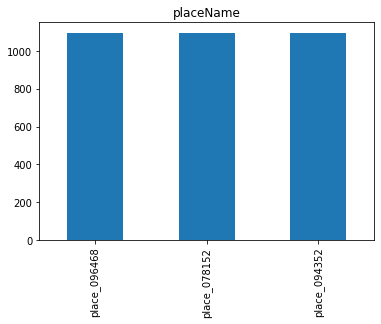

Text(0.5, 1.0, 'postalcode')

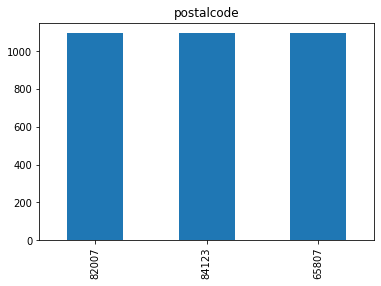

Text(0.5, 1.0, 'postalcodeW')

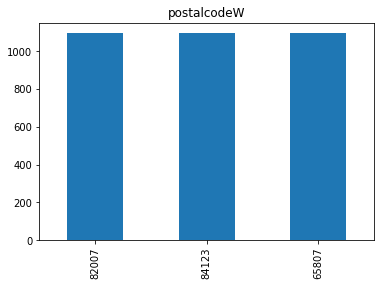

Text(0.5, 1.0, 'producttype')

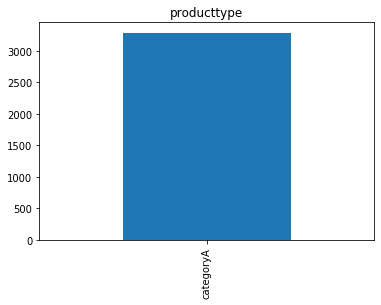

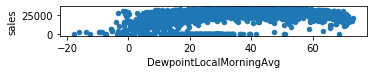

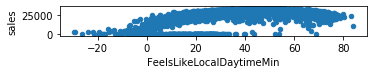

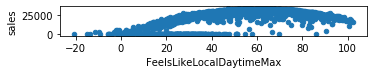

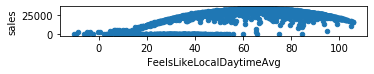

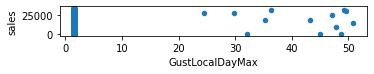

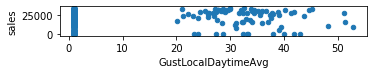

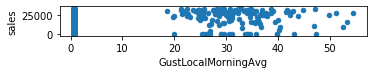

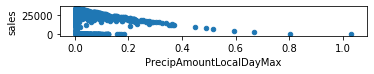

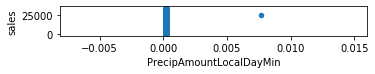

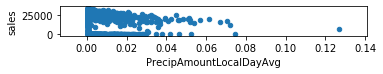

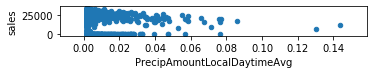

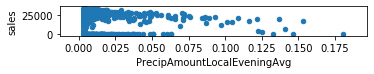

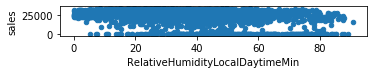

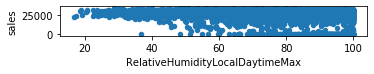

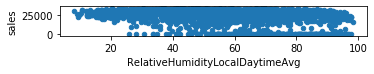

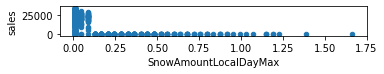

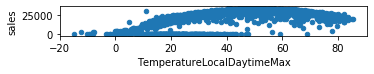

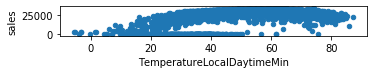

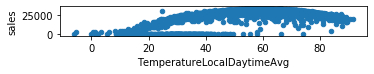

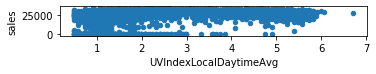

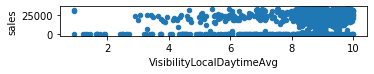

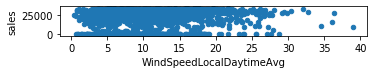

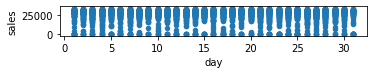

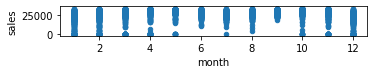

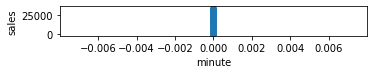

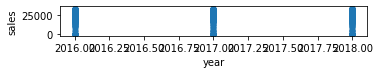

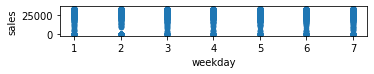

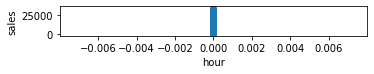

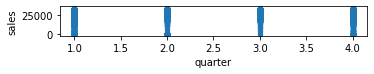

{'sales': 'mean'}
{'DewpointLocalMorningAvg': 'mean', 'FeelsLikeLocalDaytimeMin': 'mean', 'FeelsLikeLocalDaytimeMax': 'mean', 'FeelsLikeLocalDaytimeAvg': 'mean', 'GustLocalDayMax': 'mean', 'GustLocalDaytimeAvg': 'mean', 'GustLocalMorningAvg': 'mean', 'PrecipAmountLocalDayMax': 'mean', 'PrecipAmountLocalDayMin': 'mean', 'PrecipAmountLocalDayAvg': 'mean', 'PrecipAmountLocalDaytimeAvg': 'mean', 'PrecipAmountLocalEveningAvg': 'mean', 'RelativeHumidityLocalDaytimeMin': 'mean', 'RelativeHumidityLocalDaytimeMax': 'mean', 'RelativeHumidityLocalDaytimeAvg': 'mean', 'SnowAmountLocalDayMax': 'mean', 'TemperatureLocalDaytimeMax': 'mean', 'TemperatureLocalDaytimeMin': 'mean', 'TemperatureLocalDaytimeAvg': 'mean', 'UVIndexLocalDaytimeAvg': 'mean', 'VisibilityLocalDaytimeAvg': 'mean', 'WindSpeedLocalDaytimeAvg': 'mean'}
{'date': 'count'}
combo columns: ['placeId', 'producttype']
(3, 26) [3, 1] 3


placeId producttype  samplesize         sales  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  078152  categoryA   1096        25593.128695  45.804854                46.136297                 62.695632                 66.731856                 1.538349         1.388009             1.396754             0.027505                 0.000235                 0.003483                 0.004091                     0.006725                     41.026790                        86.752596                        61.686160                        0.017200               52.308133                   56.420352                   59.618595                   2.951441                8.766063                   9.397811                
1  094352  categoryA   1096        23486.023303  26.862355                32.817283                 49.550048                 53.886029                 1.846140         2.605646             3.579445             0.016448                 0.000235                 0.002343                 0.003269                     0.005870                     25.288375                        69.089909                        44.536169                        0.060306               42.684867                   45.802816                   50.006341                   2.818616                8.691676                   12.152838               
2  096468  categoryA   1096        24659.807609  33.040562                42.289290                 57.866837                 62.412814                 1.454665         1.165939             1.183061             0.016743                 0.000241                 0.002687                 0.003616                     0.006090                     27.486369                        68.022810                        46.168842                        0.041376               48.835907                   52.222706                   56.053138                   2.771219                8.723335                   7.561547

{'date': 'count', 'producttype': <function <lambda> at 0x7fc388a14d90>}
combo columns: ['placeId']
(3, 26) [3] 3


placeId  samplesize  producttype         sales  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  078152  1096        [categoryA]  25593.128695  45.804854                46.136297                 62.695632                 66.731856                 1.538349         1.388009             1.396754             0.027505                 0.000235                 0.003483                 0.004091                     0.006725                     41.026790                        86.752596                        61.686160                        0.017200               52.308133                   56.420352                   59.618595                   2.951441                8.766063                   9.397811                
1  094352  1096        [categoryA]  23486.023303  26.862355                32.817283                 49.550048                 53.886029                 1.846140         2.605646             3.579445             0.016448                 0.000235                 0.002343                 0.003269                     0.005870                     25.288375                        69.089909                        44.536169                        0.060306               42.684867                   45.802816                   50.006341                   2.818616                8.691676                   12.152838               
2  096468  1096        [categoryA]  24659.807609  33.040562                42.289290                 57.866837                 62.412814                 1.454665         1.165939             1.183061             0.016743                 0.000241                 0.002687                 0.003616                     0.006090                     27.486369                        68.022810                        46.168842                        0.041376               48.835907                   52.222706                   56.053138                   2.771219                8.723335                   7.561547

{'date': 'count', 'placeId': <function <lambda> at 0x7fc388a2dc80>}
combo columns: ['producttype']
(1, 26) [1] 1


producttype  samplesize                   placeId         sales  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
0  categoryA   3288        [078152, 094352, 096468]  24579.653203  35.235924                40.41429                  56.704172                 61.010233                 1.613051         1.719865             2.053087             0.020232                 0.000237                 0.002838                 0.003659                     0.006228                     31.267178                        74.621772                        50.797057                        0.039627               47.942969                   51.481958                   55.226025                   2.847092                8.727025                   9.704065

DONE: 'STEP 1.3: Explore Data' analysis


In [11]:

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# compute number of dependent variables
num_dvariables = len(list_variablesdependent)

#
list_columnsall = df.columns.to_list()
list_columnsnumerical = sorted(df.select_dtypes(include=['float64', 'int64']).columns.to_list())
list_columnscategorical = sorted(list(set(list_columnsall) - set(list_columnsnumerical)))
valu_numrows = df.shape[0]

#
for colnow in list_columnsnumerical:    
    df[colnow].hist(bins=int(math.sqrt(valu_numrows)))
    plt.title(colnow)
    plt.show()
    
#
for colnow in list_columnscategorical:    
    df[colnow].value_counts().plot(kind="bar")
    plt.title(colnow)
    plt.show()
    
#
for colnow in list_colpick_weather + list_columnsother:
    fig, figaxes = plt.subplots(1, num_dvariables, figsize=(5 * num_dvariables, num_dvariables));
    fig.tight_layout()
    
    #
    # note: if ~isinstance(figaxes, Iterable) then figaxes = (figaxes, )
    if num_dvariables == 1:
        figaxes = [figaxes]
    
    for axnow, dvnow in zip(figaxes, list_variablesdependent):
        df[[dvnow, colnow]].plot(ax=axnow, kind='scatter', y=dvnow, x=colnow)
    
    plt.subplots_adjust(wspace=0.55)
    plt.show()
    

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

#
dict_columnsagg_part2 = {}
for ii in list_variablesdependent:
    dict_columnsagg_part2.update({ii: "mean"})

print(dict_columnsagg_part2)

#
dict_columnsagg_part3 = {}
for ii in list_colpick_weather:
    dict_columnsagg_part3.update({ii: "mean"})

print(dict_columnsagg_part3)


#
for rr in range(len(list_columnscomboby), 0, -1):

    list_combos = list(itertools.combinations(list_columnscomboby, rr))
    
    for combo_now in list_combos:
        
        #
        list_columnscomboby_now = list(combo_now)
        list_columnstolambda = list(set(list_columnscomboby) - set(list_columnscomboby_now))
        
        #
        dict_columnsagg_part1 = {"date": "count"}
        for ii in list_columnstolambda:
            dict_columnsagg_part1.update({ii: lambda x: list(set(x))})

        print(dict_columnsagg_part1)

        #
        dict_columnsagg_full = {}
        dict_columnsagg_full.update(dict_columnsagg_part1)
        dict_columnsagg_full.update(dict_columnsagg_part2)
        dict_columnsagg_full.update(dict_columnsagg_part3)

        #
        dfA = df.groupby(list_columnscomboby_now, as_index=False).agg(dict_columnsagg_full).\
            reset_index(inplace=False, drop=True).\
            rename(columns={"date": "samplesize"})

        #
        temp = df.loc[:, list_columnscomboby_now].nunique().tolist()
        print("combo columns: " + str(list_columnscomboby_now))
        print(dfA.shape, temp, np.prod(temp))
#         mydfdescribe(dfA)
        display(dfA.sort_values(by=list_columnscomboby_now, ascending=[True]*len(list_columnscomboby_now)))


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.3: Explore Data' analysis")


# STEP 2.1: Build Predictive Models

This step builds machine-learning-based predictive models using the specified algorithms in the *list_mla* configuration and the data computed by the *makedatastrata* function as inputs to the *makemodels* function. The *makedatastrata* function divides the entire original data according to all combinations of the unique values from the variables in the *list_columnsstratby* configuration, thereby computing a list of datasets with each list item is a data strata corresponding to a combination. Changing the *list_mla* configuration parameter facilitates trying different model types. But presently this example builds models using one algorithm per the following two approaches with basic arbitrary parameters (rather than optimized parameters for instance via a grid search algorithm) for model estimation (aka tuning aka data fitting).

 1. Random Forest Regressor *with* the weather Data
 2. Random Forest Regressor *without* the weather Data

The *makemodels* code splits each stratified dataset into a model training dataset (i.e., ~75% of the sample data) and a model testing dataset (i.e., ~25% of the sample data) to both estimate a model with the training data then evaluate the estimated model with the testing data.  The evaluation analysis encompasses the n-fold crossvalidation technique to tune each model whereby the *num_cvrepeats* configuration specifies the n (number of folds) of the n-fold process. The function also finds the best-performing crossvalidated model per machine-learning algorithm via a score (aka objective function) specified by the *valu_metricpickbestmodel* configuration. The code also displays some model estimation results during computation. Lastly, the *makemodels* function builds each model and returns the process results as a dictionary (*dict_results* in the above function) with the following various content. Each dictionary is an element in a list of all results spanning the combinations of stratified dataset and machine-learning algorithm.

    dict_results["name_data"] is a string identifying the stratified dataset as model input data
    dict_results["variables_independent"] is a list of independent variables in the model input data
    dict_results["variable_dependent"] = is a string naming the dependent variable for model prediction 
    dict_results["datascaler"] = is an object that scales each independent variable of model input data
    dict_results["name_mla"] = is a string naming the machine-learning algorithm that made the model
    dict_results["cvresults_models"] = is a list of crossvalidation results each item a dictionary of model info
    dict_results["cvresults_modelbest"] = is a dictionary of the best crossvalidation result model
    dict_results["cvresults_modelbestscore"] = is a float of the best crossvalidation result model score
    dict_results["cvresults_modelbestindex"] = is a float of the best crossvalidation result model score index

This step builds only six total models (i.e., the first three strata per the two approaches of the one machine-learing algorithm) for demonstrative purposes.

In [12]:
# ----------------------------------------------------------------------------------------------------------------------
# PICK A FEW PLACES
# ----------------------------------------------------------------------------------------------------------------------

# restrict subsequent data analyses to the first three (3) places
list_fewplaces = df["placeId"].unique().tolist()[0:3]
dffew = df.loc[df["placeId"].isin(list_fewplaces), :]

# save table: independent variables (i.e., weather variables) and dependent variables (e.g., sales variable)
savefile = "/project_data/data_asset/weather_and_sales.csv"
dfX = dffew.loc[dffew["year"].isin(list_keepyears_apply), ["date", "placeId"] + list_colpick_weather + list_variablesdependent]
# dfX.to_csv(savefile, sep=",", header=True, index=False)

# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE STRATIFIED DATASETS
# ----------------------------------------------------------------------------------------------------------------------

#
ttic = time.time()
datastrata_build1 = makedatastrata(dffew, "withweather", list_keepyears_build)
datastrata_build2 = makedatastrata(dffew.drop(columns=list_columnsweather_all, inplace=False, errors="ignore"), "withoutweather", list_keepyears_build)
datastrata_apply1 = makedatastrata(dffew, "withweather", list_keepyears_apply)
datastrata_apply2 = makedatastrata(dffew.drop(columns=list_columnsweather_all, inplace=False, errors="ignore"), "withoutweather", list_keepyears_apply)
ttoc = time.time()
print("elapsed time of makedatastrata:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE MODELS
# ----------------------------------------------------------------------------------------------------------------------

# compute models
ttic = time.time()
list_mla = [
    RandomForestRegressor(max_depth=5, n_estimators=3, max_features=20, criterion="mae")]

results_modelsbuild1 = makemodels(datastrata_build1, list_mla)
results_modelsbuild2 = makemodels(datastrata_build2, list_mla)
ttoc = time.time()
print("elapsed time of makemodels:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE "MODEL EVALUATION" RESULTS: VIA "APPLY MODEL" PREDICTIONS
# ----------------------------------------------------------------------------------------------------------------------

# compute related plots
ttic = time.time()
results_evaluateapply1 = evalmodels_apply(datastrata_apply1, results_modelsbuild1)
results_evaluateapply2 = evalmodels_apply(datastrata_apply2, results_modelsbuild2)
ttoc = time.time()
print("elapsed time of evalmodels_build:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.1: Build Predictive Models' Work")


dataset size (dfM): (3288, 34)


DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg     sales placeId  minute  hour  weekday  day  month  quarter  year        date      group  columns_ohe
0     19.294962                13.980513                 29.574154                 33.848282                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     35.408451                        90.968269                        58.350410                        0.010339               25.651545                   28.390444                   32.289480                   1.239738                8.665123                   8.255852                  0.00      078152  0       0     6        1    1      1        2016  2016-01-01  (078152,) NaN         
1    -2.485020                -6.179487                  15.714154                 18.218306                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.008451                        48.268269                        38.833743                        0.010339               14.851545                   15.610444                   20.739474                   1.156404                8.665123                   10.306436                 0.00      094352  0       0     6        1    1      1        2016  2016-01-01  (094352,) NaN         
2    -1.825032                -5.459487                  21.294154                 21.368306                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     33.308451                        74.368269                        51.325412                        0.010339               10.891545                   10.030444                   15.249474                   1.156404                9.503822                   1.768552                  0.00      096468  0       0     6        1    1      1        2016  2016-01-01  (096468,) NaN         
3     20.764968                17.220513                 40.014154                 42.203270                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.108451                        80.668269                        48.700412                        0.010339               34.651545                   31.270444                   39.114468                   1.323071                8.581911                   8.628686                  26100.46  078152  0       0     7        2    1      1        2016  2016-01-02  (078152,) NaN         
4     2.314968                 2.640513                  27.954154                 26.948270                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     21.408451                        64.668269                        39.817077                        0.010339               22.951545                   22.990444                   26.799444                   1.156404                8.500149                   8.088077     

dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: clientname_withweather_('078152',); sample size: 731
dataset: clientname_withweather_('094352',); sample size: 731
dataset: clientname_withweather_('096468',); sample size: 731
dataset size (dfM): (3288, 34)


DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg     sales placeId  minute  hour  weekday  day  month  quarter  year        date      group  columns_ohe
0    NaN                      NaN                       NaN                       NaN                       NaN              NaN                  NaN                  NaN                      NaN                      NaN                      NaN                          NaN                          NaN                              NaN                              NaN                              NaN                    NaN                         NaN                         NaN                         NaN                     NaN                        NaN                        0.00      078152  0       0     6        1    1      1        2016  2016-01-01  (078152,) NaN         
1    NaN                      NaN                       NaN                       NaN                       NaN              NaN                  NaN                  NaN                      NaN                      NaN                      NaN                          NaN                          NaN                              NaN                              NaN                              NaN                    NaN                         NaN                         NaN                         NaN                     NaN                        NaN                        0.00      094352  0       0     6        1    1      1        2016  2016-01-01  (094352,) NaN         
2    NaN                      NaN                       NaN                       NaN                       NaN              NaN                  NaN                  NaN                      NaN                      NaN                      NaN                          NaN                          NaN                              NaN                              NaN                              NaN                    NaN                         NaN                         NaN                         NaN                     NaN                        NaN                        0.00      096468  0       0     6        1    1      1        2016  2016-01-01  (096468,) NaN         
3    NaN                      NaN                       NaN                       NaN                       NaN              NaN                  NaN                  NaN                      NaN                      NaN                      NaN                          NaN                          NaN                              NaN                              NaN                              NaN                    NaN                         NaN                         NaN                         NaN                     NaN                        NaN                        26100.46  078152  0       0     7        2    1      1        2016  2016-01-02  (078152,) NaN         
4    NaN                      NaN                       NaN                       NaN                       NaN              NaN                  NaN                  NaN                      NaN                      NaN                      NaN                          NaN                          NaN                              NaN                              NaN                              NaN                    NaN                         NaN                         NaN                         NaN                     NaN                        NaN           

dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: clientname_withoutweather_('078152',); sample size: 731
dataset: clientname_withoutweather_('094352',); sample size: 731
dataset: clientname_withoutweather_('096468',); sample size: 731
dataset size (dfM): (3288, 34)


DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg     sales placeId  minute  hour  weekday  day  month  quarter  year        date      group  columns_ohe
0     19.294962                13.980513                 29.574154                 33.848282                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     35.408451                        90.968269                        58.350410                        0.010339               25.651545                   28.390444                   32.289480                   1.239738                8.665123                   8.255852                  0.00      078152  0       0     6        1    1      1        2016  2016-01-01  (078152,) NaN         
1    -2.485020                -6.179487                  15.714154                 18.218306                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.008451                        48.268269                        38.833743                        0.010339               14.851545                   15.610444                   20.739474                   1.156404                8.665123                   10.306436                 0.00      094352  0       0     6        1    1      1        2016  2016-01-01  (094352,) NaN         
2    -1.825032                -5.459487                  21.294154                 21.368306                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     33.308451                        74.368269                        51.325412                        0.010339               10.891545                   10.030444                   15.249474                   1.156404                9.503822                   1.768552                  0.00      096468  0       0     6        1    1      1        2016  2016-01-01  (096468,) NaN         
3     20.764968                17.220513                 40.014154                 42.203270                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     24.108451                        80.668269                        48.700412                        0.010339               34.651545                   31.270444                   39.114468                   1.323071                8.581911                   8.628686                  26100.46  078152  0       0     7        2    1      1        2016  2016-01-02  (078152,) NaN         
4     2.314968                 2.640513                  27.954154                 26.948270                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     21.408451                        64.668269                        39.817077                        0.010339               22.951545                   22.990444                   26.799444                   1.156404                8.500149                   8.088077     

dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: clientname_withweather_('078152',); sample size: 365
dataset: clientname_withweather_('094352',); sample size: 365
dataset: clientname_withweather_('096468',); sample size: 365
dataset size (dfM): (3288, 34)


DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg     sales placeId  minute  hour  weekday  day  month  quarter  year        date      group  columns_ohe
0    NaN                      NaN                       NaN                       NaN                       NaN              NaN                  NaN                  NaN                      NaN                      NaN                      NaN                          NaN                          NaN                              NaN                              NaN                              NaN                    NaN                         NaN                         NaN                         NaN                     NaN                        NaN                        0.00      078152  0       0     6        1    1      1        2016  2016-01-01  (078152,) NaN         
1    NaN                      NaN                       NaN                       NaN                       NaN              NaN                  NaN                  NaN                      NaN                      NaN                      NaN                          NaN                          NaN                              NaN                              NaN                              NaN                    NaN                         NaN                         NaN                         NaN                     NaN                        NaN                        0.00      094352  0       0     6        1    1      1        2016  2016-01-01  (094352,) NaN         
2    NaN                      NaN                       NaN                       NaN                       NaN              NaN                  NaN                  NaN                      NaN                      NaN                      NaN                          NaN                          NaN                              NaN                              NaN                              NaN                    NaN                         NaN                         NaN                         NaN                     NaN                        NaN                        0.00      096468  0       0     6        1    1      1        2016  2016-01-01  (096468,) NaN         
3    NaN                      NaN                       NaN                       NaN                       NaN              NaN                  NaN                  NaN                      NaN                      NaN                      NaN                          NaN                          NaN                              NaN                              NaN                              NaN                    NaN                         NaN                         NaN                         NaN                     NaN                        NaN                        26100.46  078152  0       0     7        2    1      1        2016  2016-01-02  (078152,) NaN         
4    NaN                      NaN                       NaN                       NaN                       NaN              NaN                  NaN                  NaN                      NaN                      NaN                      NaN                          NaN                          NaN                              NaN                              NaN                              NaN                    NaN                         NaN                         NaN                         NaN                     NaN                        NaN           

dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: clientname_withoutweather_('078152',); sample size: 365
dataset: clientname_withoutweather_('094352',); sample size: 365
dataset: clientname_withoutweather_('096468',); sample size: 365
elapsed time of makedatastrata: 4.555752754211426
sample size of group clientname_withweather_('078152',): 731

dependent variable (aka criterion variable): SALES
any nan: False ;  all finite: True
any nan: False ;  all finite: True
mla: RANDOMFOREST

{'fit_time': array([0.01427269, 0.01248336, 0.01203871, 0.01283908, 0.01220059]), 'score_time': array([0.00291562, 0.00261784, 0.00266171, 0.00263262, 0.00266433]), 'estimator': (RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=5, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_lea

{'fit_time': array([0.01554775, 0.01268792, 0.01354623, 0.01259851, 0.01202846]), 'score_time': array([0.00261497, 0.00288296, 0.00275826, 0.00281262, 0.00283289]), 'estimator': (RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=5, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=5, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_f

any nan: False ;  all finite: True
mla: RANDOMFOREST

{'fit_time': array([0.01004314, 0.00576067, 0.00541639, 0.00565171, 0.00549459]), 'score_time': array([0.00263357, 0.00260639, 0.00259614, 0.00257802, 0.00261116]), 'estimator': (RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=5, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=5, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
 

clientname_withweather_('094352',) sales RANDOMFOREST 463.8033333333369
any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 1911.4033470319634, 'mape': nan, 'rms': 3737.599108708608, 'mse': 13969647.097419383, 'vs': 0.8815082582970597, 'r2': 0.8745935560214111}
clientname_withweather_('096468',) sales RANDOMFOREST 545.866666666665
any nan: False ;  all finite: True
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 1461.2228447488583, 'mape': nan, 'rms': 3143.395230465332, 'mse': 9880933.5749122, 'vs': 0.8620051790429689, 'r2': 0.8568266988590624}
DONE: EVALMODELS_APPLY!
clientname_withoutweather_('078152',) sales RANDOMFOREST 1888.3041666666668
any nan: True ;  all finite: False
any nan: False ;  all finite: True
prediction performance metrics:  {'mae': 4799.545831050229, 'mape': inf, 'rms': 7035.9968264429845, 'mse': 49505251.34171575, 'vs': 0.042645734988398964, 'r2': -0.026801058210184747}
clientnam

# STEP 2.2: Make then Save Dashboard Data

This step computes the following three files as the primary dashboard data both to evaluate the predictive performance of models built using weather data and to explore any potential predictive relationships between the weather variables and the sales variable. The files have storage in the `/project_data/data_asset/` directory of the provided WML CP4D project (e.g., see the "Files" tab of the "Find and Add Data" icon).<br>

* *buildmodels_performances.csv*: use for a boxplots figure that illustrates better predictions via "with weather data" approach than "without weather data" approach.
 
* *variables_importances.csv*: use for a heatmap figure that illustrates the variables importances per model.
 
* *timevariantresults.csv*: use for the remaining (i.e., scatterplots and mapplot) figures that illustrate additional predictive performance evaluations, possible correlations between sales and weather, and location-specific sales predictions.

In [13]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE THEN SAVE "MODELS VARIABLES IMPORTANCES" TABLE
# ----------------------------------------------------------------------------------------------------------------------

#
savefile = "/project_data/data_asset/variables_importances.csv"

#
list_mvars = ["machinelearner"]
list_cvars = ["client", "datatype"] + list_columnsstratby
list_ivars = results_modelsbuild1[0]["variables_independent"]
data_varimpvals = []

#
for ii in results_modelsbuild1:
    
    #
    list_mlavals = [str(ii["cvresults_modelbest"]["estimator"]).split("(")[0].lower()]
    
    #
    temp = ii["cvresults_modelbest"]["variables_importances"]
    list_impvals = [dict(temp)[vv] if vv in list(dict(temp).keys()) else 0.0 for vv in list_ivars]
    
    #
    temp = ii["name_data"].replace("(", "").replace(")", "").replace("'", "").replace(" ", "").replace("_", ",")
    if len(list_columnsstratby) == 1:
        list_catvals = temp[:-1].split(",")
    else:
        list_catvals = temp.split(",")
    
    # initialize list of lists 
    data_varimpvals.append(list_catvals + list_impvals + list_mlavals)
    
# compute dataframe
dfV = pd.DataFrame(data_varimpvals, columns=(list_cvars + list_ivars + list_mvars))
dfV = dfV.merge(df1a.loc[:, ["placeId", "placeName", "postalcode", "countrycode"]].drop_duplicates(), 
                      left_on=["placeId"], right_on=["placeId"], how="left")

# confirm table
mydfdescribe(dfV)
display(dfV)
dfV.shape

# save table
dfV.loc[(dfV["machinelearner"] == "randomforestregressor"), :].to_csv(savefile, sep=",", header=True, index=False)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.2a: Make then Store Model Variables Importances Data' Work")


dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative                    min                    max  kurtosis
client                           object   1        3      0.0          0.0            0.000000     NaN                clientname             clientname            NaN      
datatype                         object   1        3      0.0          0.0            0.000000     NaN                withweather            withweather           NaN      
placeId                          object   3        3      0.0          0.0            0.000000     NaN                078152                 096468                NaN      
DewpointLocalMorningAvg          float64  3        3      0.0          0.0            0.333333      0.0               0                      0.0175999             NaN      
FeelsLikeLocalDaytimeMin         float64  3        3      0.0          0.0            0.000000      0.0               0.00855416             0.0926786             NaN      
FeelsLikeLocalDaytimeMax         float64  3        3      0.0          0.0            0.000000      0.0               0.0285683              0.278759              NaN      
FeelsLikeLocalDaytimeAvg         float64  3        3      0.0          0.0            0.000000      0.0               0.032326               0.142682              NaN      
GustLocalDayMax                  float64  1        3      0.0          0.0            1.000000      0.0               0                      0                     NaN      
GustLocalDaytimeAvg              float64  1        3      0.0          0.0            1.000000      0.0               0                      0                     NaN      
GustLocalMorningAvg              float64  1        3      0.0          0.0            1.000000      0.0               0                      0                     NaN      
PrecipAmountLocalDayMax          float64  3        3      0.0          0.0            0.000000      0.0               0.0356646              0.0635338             NaN      
PrecipAmountLocalDayMin          float64  1        3      0.0          0.0            1.000000      0.0               0                      0                     NaN      
PrecipAmountLocalDayAvg          float64  2        3      0.0          0.0            0.666667      0.0               0                      0.0472132             NaN      
PrecipAmountLocalDaytimeAvg      float64  2        3      0.0          0.0            0.666667      0.0               0                      0.015081              NaN      
PrecipAmountLocalEveningAvg      float64  2        3      0.0          0.0            0.666667      0.0               0                      0.0026081             NaN      
RelativeHumidityLocalDaytimeMin  float64  3        3      0.0          0.0            0.333333      0.0               0                      0.108053              NaN      
RelativeHumidityLocalDaytimeMax  float64  3        3      0.0          0.0            0.333333      0.0               0                      0.0262845             NaN      
RelativeHumidityLocalDaytimeAvg  float64  3        3      0.0          0.0            0.333333      0.0               0                      0.00968584            NaN      
SnowAmountLocalDayMax            float64  3        3      0.0          0.0            0.333333      0.0               0                      0.421215              NaN      
TemperatureLocalDaytimeMax       float64  3        3      0.0          0.0            0.000000      0.0               0.0363553              0.304441              NaN      
TemperatureLocalDaytimeMin       float64  3        3      0.0          0.0            0.000000      0.0               0.00285078             0.0124425             NaN      
TemperatureLocalDaytimeAvg       float64  3        3      0.0          0.0            0.000000      0.0               0.0737882              0.255037              NaN      
UVIndexLocalDaytimeAvg           float64  3        3   

client     datatype placeId  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg  minute  hour   weekday       day     month   quarter         machinelearner     placeName postalcode countrycode
0  clientname  withweather  078152  0.017600                 0.092679                  0.278759                  0.102930                  0.0              0.0                  0.0                  0.063534                 0.0                      0.047213                 0.000000                     0.002608                     0.108053                         0.026284                         0.004222                         0.000000               0.036355                    0.012442                    0.073788                    0.012405                0.044947                   0.060280                  0.0     0.0   0.003029  0.009020  0.003852  0.000000  randomforestregressor  place_078152  65807      us        
1  clientname  withweather  094352  0.000000                 0.037365                  0.028568                  0.032326                  0.0              0.0                  0.0                  0.047630                 0.0                      0.000000                 0.015081                     0.000000                     0.000000                         0.000000                         0.009686                         0.247461               0.304441                    0.005999                    0.255037                    0.006762                0.000000                   0.000688                  0.0     0.0   0.000000  0.008955  0.000000  0.000000  randomforestregressor  place_094352  82007      us        
2  clientname  withweather  096468  0.001854                 0.008554                  0.135204                  0.142682                  0.0              0.0                  0.0                  0.035665                 0.0                      0.000000                 0.000000                     0.000000                     0.060958                         0.000608                         0.000000                         0.421215               0.071689                    0.002851                    0.104300                    0.006072                0.004497                   0.002394                  0.0     0.0   0.000000  0.000914  0.000386  0.000157  randomforestregressor  place_096468  84123      us

(3, 35)

DONE: 'STEP 2.2a: Make then Store Model Variables Importances Data' Work


dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative  \
approach                         object   2.0      30     0.0          0.0            0.0          NaN                 
namedata                         object   6.0      30     0.0          0.0            0.0          NaN                 
vardependent                     object   1.0      30     0.0          0.0            0.0          NaN                 
namemla                          object   1.0      30     0.0          0.0            0.0          NaN                 
train_neg_mean_absolute_error    float64  30.0     30     0.0          0.0            0.0           1.000000           
train_explained_variance         float64  30.0     30     0.0          0.0            0.0           0.000000           
fit_time                         float64  30.0     30     0.0          0.0            0.0           0.000000           
train_r2                         float64  30.0     30     0.0          0.0            0.0           0.000000           
estimator                        object   30.0     30     0.0          0.0            0.0          NaN                 
variables_importances            object  NaN       30     0.0          0.0            0.0          NaN                 
test_neg_mean_absolute_error     float64  30.0     30     0.0          0.0            0.0           1.000000           
test_explained_variance          float64  30.0     30     0.0          0.0            0.0           0.233333           
train_neg_median_absolute_error  float64  30.0     30     0.0          0.0            0.0           1.000000           
test_r2                          float64  30.0     30     0.0          0.0            0.0           0.266667           
test_neg_median_absolute_error   float64  30.0     30     0.0          0.0            0.0           1.000000           
score_time                       float64  28.0     30     0.0          0.0            0.0           0.000000           
placeId                          object   3.0      30     0.0          0.0            0.0          NaN                 
placeName                        object   3.0      30     0.0          0.0            0.0          NaN                 
postalcode                       object   3.0      30     0.0          0.0            0.0          NaN                 
countrycode                      object   1.0      30     0.0          0.0            0.0          NaN                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             min  \
approach                         withoutweather                                                                                                                                                                                                                                                                                                                                                                                                                                                      

approach                               namedata vardependent       namemla  train_neg_mean_absolute_error  train_explained_variance  fit_time  train_r2  \
0   withweather     clientname_withweather_('078152',)     sales        RANDOMFOREST -866.579384                     0.902816                  0.014273  0.901876   
1   withweather     clientname_withweather_('078152',)     sales        RANDOMFOREST -747.493174                     0.954745                  0.012483  0.952668   
2   withweather     clientname_withweather_('078152',)     sales        RANDOMFOREST -1058.048459                    0.799291                  0.012039  0.797055   
3   withweather     clientname_withweather_('078152',)     sales        RANDOMFOREST -734.086995                     0.974718                  0.012839  0.973996   
4   withweather     clientname_withweather_('078152',)     sales        RANDOMFOREST -1237.517834                    0.863709                  0.012201  0.863691   
5   withweather     clientname_withweather_('094352',)     sales        RANDOMFOREST -1172.134384                    0.947451                  0.015548  0.947396   
6   withweather     clientname_withweather_('094352',)     sales        RANDOMFOREST -838.196279                     0.972277                  0.012688  0.971733   
7   withweather     clientname_withweather_('094352',)     sales        RANDOMFOREST -839.017534                     0.973237                  0.013546  0.972453   
8   withweather     clientname_withweather_('094352',)     sales        RANDOMFOREST -753.168481                     0.957215                  0.012599  0.956163   
9   withweather     clientname_withweather_('094352',)     sales        RANDOMFOREST -1093.266678                    0.940037                  0.012028  0.939012   
10  withweather     clientname_withweather_('096468',)     sales        RANDOMFOREST -661.451427                     0.987377                  0.013004  0.987314   
11  withweather     clientname_withweather_('096468',)     sales        RANDOMFOREST -778.909943                     0.979645                  0.011929  0.979441   
12  withweather     clientname_withweather_('096468',)     sales        RANDOMFOREST -668.842979                     0.986538                  0.011937  0.986270   
13  withweather     clientname_withweather_('096468',)     sales        RANDOMFOREST -911.887109                     0.965108                  0.011839  0.964265   
14  withweather     clientname_withweather_('096468',)     sales        RANDOMFOREST -558.946871                     0.990807                  0.012759  0.990748   
15  withoutweather  clientname_withoutweather_('078152',)  sales        RANDOMFOREST -2682.078584                    0.493889                  0.009839  0.484894   
16  withoutweather  clientname_withoutweather_('078152',)  sales        RANDOMFOREST -2704.856005                    0.502365                  0.005646  0.475456   
17  withoutweather  clientname_withoutweather_('078152',)  sales        RANDOMFOREST -2909.484658                    0.301800                  0.005329  0.284226   
18  withoutweather  clientname_withoutweather_('078152',)  sales        RANDOMFOREST -2784.846134                    0.545567                  0.005425  0.540191   
19  withoutweather  clientname_withoutweather_('078152',)  sales        RANDOMFOREST -2993.470771                    0.465943                  0.005464  0.464990   
20  withoutweather  clientname_withoutweather_('094352',)  sales        RANDOMFOREST -4510.163265                    0.466350                  0.010043  0.464663   
21  withoutweather  clientname_withoutweather_('094352',)  sales        RANDOMFOREST -3839.144212                    0.541341                  0.005761  0.531725   
22  withoutweather  clientname_withoutweather_('094352',)  sales        RANDOMFOREST -4641.603253                    0.442579                  0.005416  0.442472   
23  withoutweather  clientname_withoutweather_('09

(30, 20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3954c01d0>,
      dtype=object)

DONE: 'STEP 2.2b: Make then Store Build Model Performance Data' Work


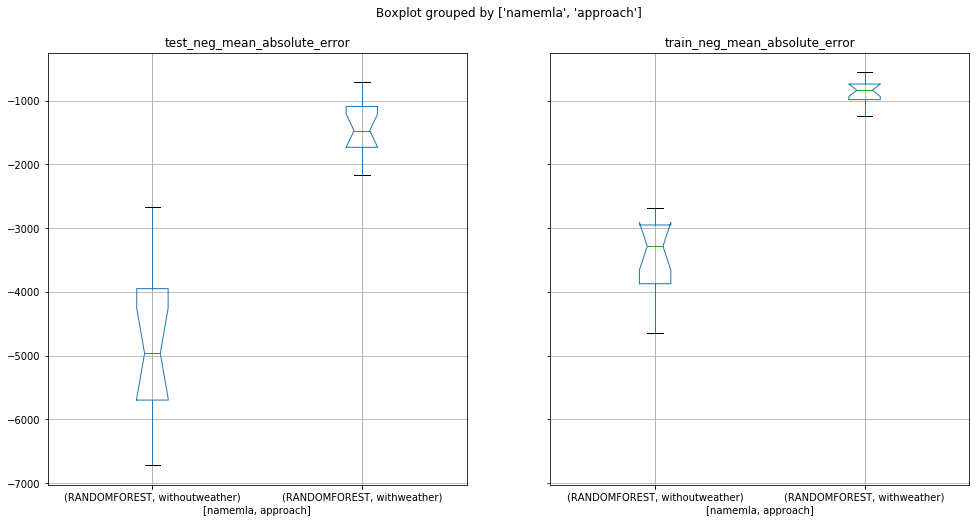

In [14]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE THEN SAVE "MODEL EVALUATION" TABLE: VIA "BUILD MODEL" PERFORMANCE
# ----------------------------------------------------------------------------------------------------------------------

#
def getcolumns_fromdataname(dftemp, dataname):

    #
    temp = dataname.replace("(", "").replace(")", "").replace("'", "").replace(" ", "").replace("_", ",")
    if len(list_columnsstratby) == 1:
        list_valsnamedata = temp[:-1].split(",")
    else:
        list_valsnamedata = temp.split(",")

    #    
    for kk, jj in enumerate(list_columnsstratby):
        dftemp[jj] = list_valsnamedata[(kk + 2)]
        
    #
    return dftemp



#
savefile = "/project_data/data_asset/buildmodels_performances.csv"

#
list_columnsfirst = ["approach", "namedata", "vardependent", "namemla"]

#
dfP = pd.DataFrame({})

for ii in results_modelsbuild1 + results_modelsbuild2:
    dfTemp = pd.DataFrame(ii["cvresults_models"])
    dfTemp["approach"] = (lambda v: "withweather" if ("withweather" in v) else "withoutweather")(ii["name_data"])
    dfTemp = getcolumns_fromdataname(dfTemp, ii["name_data"])
    dfTemp["namedata"] = ii["name_data"]
    dfTemp["namemla"] = ii["name_mla"]
    dfTemp["vardependent"] = ii["variable_dependent"]
    dfP = pd.concat([dfP, dfTemp], axis=0)
    
dfP = dfP.loc[:, list_columnsfirst + list(set(dfP.columns) - set(list_columnsfirst))]
dfP = dfP.merge(df1a.loc[:, ["placeId", "placeName", "postalcode", "countrycode"]].drop_duplicates(), 
                      left_on=["placeId"], right_on=["placeId"], how="left")

# confirm table
mydfdescribe(dfP)
display(dfP)
dfP.shape

# save table
dfP.to_csv(savefile, sep=",", header=True, index=False)


#
list_plotmetrics = ["test_neg_mean_absolute_error", "train_neg_mean_absolute_error"]

dfP.boxplot(column=list_plotmetrics, by=["namemla", "approach"], notch=True, figsize=(16,8))

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.2b: Make then Store Build Model Performance Data' Work")


In [15]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE THEN SAVE "MODEL EVALUATION" TABLE: VIA "APPLY MODEL" PREDICTIONS
# ----------------------------------------------------------------------------------------------------------------------

#
savefile = "/project_data/data_asset/applymodels_predictions.csv"

#
dfT1 = maketable_predictions(results_evaluateapply1).drop(columns=["datatype"], inplace=False, errors="ignore").rename(columns={"ypred": "ypredWith"})
dfT2 = maketable_predictions(results_evaluateapply2).drop(columns=["datatype", "ytrue"], inplace=False, errors="ignore").rename(columns={"ypred": "ypredWithout"})

dfT = dfT1.merge(dfT2, 
                 left_on=["client", "namedepvar", "namemodel", "placeId", "date"], 
                 right_on=["client", "namedepvar", "namemodel", "placeId", "date"], 
                 how="left")

dfT = dfT.merge(df1a.loc[:, ["placeId", "placeName", "postalcode", "countrycode"]].drop_duplicates(), 
                      left_on=["placeId"], right_on=["placeId"], how="left")

# confirm table
mydfdescribe(dfT)
display(dfT)
dfT.shape

# # save table
# dfT.to_csv(savefile, sep=",", header=True, index=False)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.2c: Make then Store Apply Model Predictions Data' Work")


dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative           min           max  kurtosis
client        object   1        1095   0.0          0.0            0.000000     NaN                clientname    clientname   NaN      
namedepvar    object   1        1095   0.0          0.0            0.000000     NaN                sales         sales        NaN      
namemodel     object   1        1095   0.0          0.0            0.000000     NaN                RANDOMFOREST  RANDOMFOREST NaN      
placeId       object   3        1095   0.0          0.0            0.000000     NaN                078152        096468       -1.501372
date          object   365      1095   0.0          0.0            0.000000     NaN                2018-01-01    2018-12-31   NaN      
ytrue         float64  1006     1095   0.0          0.0            0.082192      0.0               0             33852.4       2.152083
ypredWith     float64  284      1095   0.0          0.0            0.051142      0.0               0             30837.4       3.214383
ypredWithout  float64  261      1095   0.0          0.0            0.000000      0.0               8583.4        31727         3.714615
placeName     object   3        1095   0.0          0.0            0.000000     NaN                place_078152  place_096468 NaN      
postalcode    object   3        1095   0.0          0.0            0.000000     NaN                65807         84123        -1.501372
countrycode   object   1        1095   0.0          0.0            0.000000     NaN                us            us           NaN

client namedepvar     namemodel placeId        date     ytrue     ypredWith  ypredWithout     placeName postalcode countrycode
0     clientname  sales      RANDOMFOREST  078152  2018-01-01  0.00      15858.550000  19226.668333  place_078152  65807      us        
1     clientname  sales      RANDOMFOREST  078152  2018-01-02  4020.66   15858.550000  23398.510000  place_078152  65807      us        
2     clientname  sales      RANDOMFOREST  078152  2018-01-03  11305.12  15475.866667  23398.510000  place_078152  65807      us        
3     clientname  sales      RANDOMFOREST  078152  2018-01-04  13228.25  15858.550000  23398.510000  place_078152  65807      us        
4     clientname  sales      RANDOMFOREST  078152  2018-01-05  21523.94  16134.756667  24648.766667  place_078152  65807      us        
5     clientname  sales      RANDOMFOREST  078152  2018-01-06  14300.67  16606.086667  25285.313333  place_078152  65807      us        
6     clientname  sales      RANDOMFOREST  078152  2018-01-07  16180.84  19033.290000  24459.673333  place_078152  65807      us        
7     clientname  sales      RANDOMFOREST  078152  2018-01-08  21528.16  22959.170000  23345.991667  place_078152  65807      us        
8     clientname  sales      RANDOMFOREST  078152  2018-01-09  21500.10  20821.970000  29316.375000  place_078152  65807      us        
9     clientname  sales      RANDOMFOREST  078152  2018-01-10  30941.77  30344.053333  29316.375000  place_078152  65807      us        
10    clientname  sales      RANDOMFOREST  078152  2018-01-11  24496.59  20130.306667  29316.375000  place_078152  65807      us        
11    clientname  sales      RANDOMFOREST  078152  2018-01-12  5216.22   15858.550000  30566.631667  place_078152  65807      us        
12    clientname  sales      RANDOMFOREST  078152  2018-01-13  10504.72  15858.550000  31203.178333  place_078152  65807      us        
13    clientname  sales      RANDOMFOREST  078152  2018-01-14  0.00      5823.706667   24459.673333  place_078152  65807      us        
14    clientname  sales      RANDOMFOREST  078152  2018-01-15  0.00      3717.910000   28787.156667  place_078152  65807      us        
15    clientname  sales      RANDOMFOREST  078152  2018-01-16  3604.70   15858.550000  29316.375000  place_078152  65807      us        
16    clientname  sales      RANDOMFOREST  078152  2018-01-17  3377.17   15858.550000  29000.253333  place_078152  65807      us        
17    clientname  sales      RANDOMFOREST  078152  2018-01-18  17634.01  12888.176667  29000.253333  place_078152  65807      us        
18    clientname  sales      RANDOMFOREST  078152  2018-01-19  27134.26  30344.053333  30250.510000  place_078152  65807      us        
19    clientname  sales      RANDOMFOREST  078152  2018-01-20  31610.75  30344.053333  30887.056667  place_078152  65807      us        
20    clientname  sales      RANDOMFOREST  078152  2018-01-21  19954.08  21686.341667  28233.493333  place_078152  65807      us        
21    clientname  sales      RANDOMFOREST  078152  2018-01-22  16677.57  22937.606667  29104.910000  place_078152  65807      us        
22    clientname  sales      RANDOMFOREST  078152  2018-01-23  22471.99  13997.556667  29603.213333  place_078152  65807      us        
23    clientname  sales      RANDOMFOREST  078152  2018-01-24  27152.07  20130.306667  29603.213333  place_078152  65807      us        
24    clientname  sales      RANDOMFOREST  078152  2018-01-25  30210.74  30344.053333  30230.893333  place_078152  65807      us        
25    clientname  sales      RANDOMFOREST  078152  2018-01-26  31379.76  30344.053333  30837.213333  place_078152  65807      us        
26    clientname  sales      RANDOMFOREST  078152  2018-01-27  28398.69  20130.306667  30887.056667  place_078152  65807      us        
27    clientname  sales      RANDOMFOREST  078152  2018-01-28  28850.07  30344.053333  29562.760000  place_078152  65807      us        
28    clientname  sales      RANDOMFO

(1095, 11)

DONE: 'STEP 2.2c: Make then Store Apply Model Predictions Data' Work


In [16]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE THEN SAVE "COMBINED TIME-VARIANT RESULTS" TABLE
# ----------------------------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

# #
# def getvalues_topweather(x, list_labels, list_ntopcol):
    
#     #
#     return pd.Series(x, index=list_labels).loc[pd.Series(x, index=list_labels).loc[list_ntopcol].values].values


# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

#
savefile = "/project_data/data_asset/timevariantresults.csv"

# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

#
dfX = dffew.\
    loc[dffew["year"].isin(list_keepyears_apply), ["date", "placeId"] + list_colpick_weather + list_variablesdependent].\
    drop(columns=["sales"], inplace=False, errors="ignore")

display(dfX)

# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

#
NUM_TOP_WEATHERVARIABLES = 3

list_topwxvarsname = []
list_topwxvalsname = []

for ii in range(1, min(NUM_TOP_WEATHERVARIABLES, 5) + 1, 1):
    list_topwxvarsname.append("topvar{0:>01}".format(ii))
    list_topwxvalsname.append("topval{0:>01}".format(ii))
    

#
dfQ1 = dfV[["placeId"] + list_colpick_weather].set_index(["placeId"]).\
    apply(lambda x: pd.Series(x.sort_values(ascending=False).iloc[:NUM_TOP_WEATHERVARIABLES].index, index=list_topwxvarsname), axis=1).reset_index()

dfQ2 = dfX[["date", "placeId"] + list_colpick_weather].set_index(["date", "placeId"]).\
    apply(lambda x: pd.Series(x[dfQ1.loc[dfQ1.placeId == str(x.name[1]), list_topwxvarsname].values.flatten().tolist()].values, index=list_topwxvalsname), axis=1).reset_index()

dfQ = dfQ1.merge(dfQ2, left_on=["placeId"], right_on=["placeId"], how="right")

display(dfQ1)
display(dfQ2)
display(dfQ)

# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

#
dfZ = dfT.merge(dfX, left_on=["date", "placeId"], right_on=["date", "placeId"], how="left").\
    merge(dfQ, left_on=["date", "placeId"], right_on=["date", "placeId"], how="left")

# confirm table
mydfdescribe(dfZ)
display(dfZ)
dfZ.shape

# save table
dfZ.to_csv(savefile, sep=",", header=True, index=False)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.2d: Make then Store Combined Time-Variant Results' Work")


date placeId  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg
2193  2018-01-01  078152 -7.675032                -17.159487                -0.845846                  2.408276                  1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     34.408451                        79.368269                        55.192077                        0.010339              -2.068455                    4.450444                    5.454486                    1.239738                9.077558                   6.149344                
2194  2018-01-01  094352  14.614962                11.100513                 20.754154                 25.118282                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     56.208451                        91.268269                        76.867077                        0.010339               12.871545                   19.390444                   20.799486                   0.906404                9.751232                   3.781852                
2195  2018-01-01  096468  19.774932                20.820513                 37.134154                 40.718252                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     41.308451                        80.968269                        60.592077                        0.010339               26.731545                   31.990444                   33.654474                   0.989738                8.987045                   2.178669                
2196  2018-01-02  078152 -5.275038                -7.979487                  11.034154                 14.918294                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     25.208451                        76.268269                        45.458743                        0.010339               5.851545                    8.050444                    13.374486                   1.323071                9.040379                   3.744569                
2197  2018-01-02  094352 -0.745050                 0.660513                  24.534154                 25.928282                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     12.108451                        55.168269                        31.142077                        0.010339               22.951545                   17.770444                   27.684504                   0.989738                9.040638                   14.034769               
2198  2018-01-02  096468  20.614956                22.440513                 37.494154                 39.278270                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     38.108451                        84.068269                        64.3337

placeId                     topvar1                          topvar2                   topvar3
0  078152  FeelsLikeLocalDaytimeMax    RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg
1  094352  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeAvg       SnowAmountLocalDayMax   
2  096468  SnowAmountLocalDayMax       FeelsLikeLocalDaytimeAvg         FeelsLikeLocalDaytimeMax

date placeId    topval1    topval2    topval3
0     2018-01-01  078152 -0.845846   34.408451  2.408276 
1     2018-01-01  094352  12.871545  20.799486  0.010339 
2     2018-01-01  096468  0.010339   40.718252  37.134154
3     2018-01-02  078152  11.034154  25.208451  14.918294
4     2018-01-02  094352  22.951545  27.684504  0.010339 
5     2018-01-02  096468  0.010339   39.278270  37.494154
6     2018-01-03  078152  14.634154  40.108451  19.838288
7     2018-01-03  094352  28.891545  35.769474  0.010339 
8     2018-01-03  096468  0.010339   35.078258  34.614154
9     2018-01-04  078152  23.454154  22.108451  23.243294
10    2018-01-04  094352  31.051545  36.414468  0.010339 
11    2018-01-04  096468  0.010339   38.153270  37.134154
12    2018-01-05  078152  37.494154  26.708451  34.568282
13    2018-01-05  094352  34.651545  43.914474  0.010339 
14    2018-01-05  096468  0.010339   40.358288  38.934154
15    2018-01-06  078152  21.114154  29.308451  23.213288
16    2018-01-06  094352  32.311545  41.274486  0.010339 
17    2018-01-06  096468  0.089079   37.568252  30.654154
18    2018-01-07  078152  24.714154  41.508451  29.828270
19    2018-01-07  094352  29.611545  37.029474  0.089079 
20    2018-01-07  096468  0.010339   42.143294  37.854154
21    2018-01-08  078152  30.114154  80.608451  36.668252
22    2018-01-08  094352  36.271545  44.589474  0.010339 
23    2018-01-08  096468  0.010339   36.218306  28.854154
24    2018-01-09  078152  24.354154  87.608451  34.193252
25    2018-01-09  094352  41.311545  50.124474  0.010339 
26    2018-01-09  096468  0.010339   46.268282  36.954154
27    2018-01-10  078152  53.334154  39.908451  53.318252
28    2018-01-10  094352  33.751545  39.714480  0.010339 
29    2018-01-10  096468  0.010339   41.213288  34.254154
30    2018-01-11  078152  50.454154  59.308451  41.243294
31    2018-01-11  094352  19.531545  28.674486  0.010339 
32    2018-01-11  096468  0.049709   40.958246  33.354154
33    2018-01-12  078152  6.534154   46.808451  11.243252
34    2018-01-12  094352  24.751545  31.509504  0.207189 
35    2018-01-12  096468  0.010339   48.218294  40.554154
36    2018-01-13  078152  18.774154  31.608451  19.163288
37    2018-01-13  094352  26.551545  34.674498  0.010339 
38    2018-01-13  096468  0.010339   46.913276  44.154154
39    2018-01-14  078152  13.194154  76.208451  21.158282
40    2018-01-14  094352  32.491545  38.109474  0.010339 
41    2018-01-14  096468  0.010339   43.628258  43.614154
42    2018-01-15  078152  15.354154  56.908451  13.208276
43    2018-01-15  094352  0.991545   10.629486  0.364669 
44    2018-01-15  096468  0.010339   44.033276  39.114154
45    2018-01-16  078152 -11.285846  55.408451 -4.656706 
46    2018-01-16  094352  14.131545  18.399474  0.010339 
47    2018-01-16  096468  0.010339   43.523282  43.614154
48    2018-01-17  078152  12.834154  49.608451  12.083276
49    2018-01-17  094352  30.511545  36.789480  0.010339 
50    2018-01-17  096468  0.010339   46.973270  45.774154
51    2018-01-18  078152  29.394154  29.808451  29.018252
52    2018-01-18  094352  41.311545  47.574486  0.010339 
53    2018-01-18  096468  0.010339   48.773270  45.594154
54    2018-01-19  078152  43.254154  31.008451  44.243282
55    2018-01-19  094352  43.291545  50.244480  0.010339 
56    2018-01-19  096468  0.522149   49.118294  45.054154
57    2018-01-20  078152  55.854154  43.808451  57.473282
58    2018-01-20  094352  18.451545  28.149498  0.089079 
59    2018-01-20  096468  0.679629   26.543252  16.614154
60    2018-01-21  078152  62.874154  50.308451  66.713276
61    2018-01-21  094352  4.771545   17.619480  1.191439 
62    2018-01-21  096468  0.010339   30.383282  22.914154
63    2018-01-22  078152  27.234154  55.008451  36.068294
64    2018-01-22  094352  13.411545  21.879486  0.010339 
65    2018-01-22  096468  0.364669   26.048270  20.394154
66    2018-01-23  078152  28.494154  53.508451  33.803282
67    2018-01-23  094352  14.851545  24.204474  0.010339 
68    2018

placeId                   topvar1                          topvar2                   topvar3        date     topval1     topval2     topval3
0     078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-01 -0.845846    34.408451   2.408276  
1     078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-02  11.034154   25.208451   14.918294 
2     078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-03  14.634154   40.108451   19.838288 
3     078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-04  23.454154   22.108451   23.243294 
4     078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-05  37.494154   26.708451   34.568282 
5     078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-06  21.114154   29.308451   23.213288 
6     078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-07  24.714154   41.508451   29.828270 
7     078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-08  30.114154   80.608451   36.668252 
8     078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-09  24.354154   87.608451   34.193252 
9     078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-10  53.334154   39.908451   53.318252 
10    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-11  50.454154   59.308451   41.243294 
11    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-12  6.534154    46.808451   11.243252 
12    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-13  18.774154   31.608451   19.163288 
13    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-14  13.194154   76.208451   21.158282 
14    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-15  15.354154   56.908451   13.208276 
15    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-16 -11.285846   55.408451  -4.656706  
16    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-17  12.834154   49.608451   12.083276 
17    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-18  29.394154   29.808451   29.018252 
18    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-19  43.254154   31.008451   44.243282 
19    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-20  55.854154   43.808451   57.473282 
20    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-21  62.874154   50.308451   66.713276 
21    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-22  27.234154   55.008451   36.068294 
22    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-23  28.494154   53.508451   33.803282 
23    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-24  44.514154   20.908451   45.788276 
24    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-25  57.114154   10.008451   56.573282 
25    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  2018-01-26  47.034154   27.308451   53.798294 
26    078152  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDa

dtypes  nunique  count  percent_nan  percent_blank  percent_zero  percent_negative                       min                         max     kurtosis
client                           object   1        1095   0.0          0.0            0.000000     NaN                clientname                clientname                 NaN         
namedepvar                       object   1        1095   0.0          0.0            0.000000     NaN                sales                     sales                      NaN         
namemodel                        object   1        1095   0.0          0.0            0.000000     NaN                RANDOMFOREST              RANDOMFOREST               NaN         
placeId                          object   3        1095   0.0          0.0            0.000000     NaN                078152                    096468                     -1.501372   
date                             object   365      1095   0.0          0.0            0.000000     NaN                2018-01-01                2018-12-31                 NaN         
ytrue                            float64  1006     1095   0.0          0.0            0.082192      0.000000          0                         33852.4                     2.152083   
ypredWith                        float64  284      1095   0.0          0.0            0.051142      0.000000          0                         30837.4                     3.214383   
ypredWithout                     float64  261      1095   0.0          0.0            0.000000      0.000000          8583.4                    31727                       3.714615   
placeName                        object   3        1095   0.0          0.0            0.000000     NaN                place_078152              place_096468               NaN         
postalcode                       object   3        1095   0.0          0.0            0.000000     NaN                65807                     84123                      -1.501372   
countrycode                      object   1        1095   0.0          0.0            0.000000     NaN                us                        us                         NaN         
DewpointLocalMorningAvg          float64  867      1095   0.0          0.0            0.000000      0.016438         -9.53503                   70.9849                    -0.531626   
FeelsLikeLocalDaytimeMin         float64  407      1095   0.0          0.0            0.000000      0.025571         -23.9995                   80.4005                    -0.833034   
FeelsLikeLocalDaytimeMax         float64  438      1095   0.0          0.0            0.000000      0.007306         -20.8258                   101.034                    -0.886458   
FeelsLikeLocalDaytimeAvg         float64  1020     1095   0.0          0.0            0.000000      0.003653         -10.3517                   103.178                    -0.928148   
GustLocalDayMax                  float64  7        1095   0.0          0.0            0.000000      0.000000          1.45467                   49.5502                     228.338167 
GustLocalDaytimeAvg              float64  31       1095   0.0          0.0            0.000000      0.000000          0.902338                  51.1266                     41.847414  
GustLocalMorningAvg              float64  49       1095   0.0          0.0            0.000000      0.000000          0.59834                   54.5437                     23.022531  
PrecipAmountLocalDayMax          float64  62       1095   0.0          0.0            0.000000      0.000000          0.0031286                 1.03069                     99.415455  
PrecipAmountLocalDayMin          float64  2        1095   0.0          0.0            0.000000      0.000000          0.000234701               0.00763931                  1095.000000
PrecipAmountLocalDayAvg          float64  145      1095   0.0          0.0            0.000000      0.000000          0.000666234               0.0718605                 

client namedepvar     namemodel placeId        date     ytrue     ypredWith  ypredWithout     placeName postalcode countrycode  DewpointLocalMorningAvg  FeelsLikeLocalDaytimeMin  FeelsLikeLocalDaytimeMax  FeelsLikeLocalDaytimeAvg  GustLocalDayMax  GustLocalDaytimeAvg  GustLocalMorningAvg  PrecipAmountLocalDayMax  PrecipAmountLocalDayMin  PrecipAmountLocalDayAvg  PrecipAmountLocalDaytimeAvg  PrecipAmountLocalEveningAvg  RelativeHumidityLocalDaytimeMin  RelativeHumidityLocalDaytimeMax  RelativeHumidityLocalDaytimeAvg  SnowAmountLocalDayMax  TemperatureLocalDaytimeMax  TemperatureLocalDaytimeMin  TemperatureLocalDaytimeAvg  UVIndexLocalDaytimeAvg  VisibilityLocalDaytimeAvg  WindSpeedLocalDaytimeAvg                   topvar1                          topvar2                   topvar3     topval1     topval2     topval3
0     clientname  sales      RANDOMFOREST  078152  2018-01-01  0.00      15858.550000  19226.668333  place_078152  65807      us         -7.675032                -17.159487                -0.845846                  2.408276                  1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     34.408451                        79.368269                        55.192077                        0.010339              -2.068455                    4.450444                    5.454486                    1.239738                9.077558                   6.149344                  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg -0.845846    34.408451   2.408276  
1     clientname  sales      RANDOMFOREST  078152  2018-01-02  4020.66   15858.550000  23398.510000  place_078152  65807      us         -5.275038                -7.979487                  11.034154                 14.918294                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     25.208451                        76.268269                        45.458743                        0.010339               5.851545                    8.050444                    13.374486                   1.323071                9.040379                   3.744569                  FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  11.034154   25.208451   14.918294 
2     clientname  sales      RANDOMFOREST  078152  2018-01-03  11305.12  15475.866667  23398.510000  place_078152  65807      us          6.664956                 2.100513                  14.634154                 19.838288                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     40.108451                        62.968269                        53.708743                        0.010339               14.131545                   20.470444                   22.239468                   1.239738                9.055085                   10.902969                 FeelsLikeLocalDaytimeMax  RelativeHumidityLocalDaytimeMin  FeelsLikeLocalDaytimeAvg  14.634154   40.108451   19.838288 
3     clientname  sales      RANDOMFOREST  078152  2018-01-04  13228.25  15858.550000  23398.510000  place_078152  65807      us          1.984938                -1.859487                  23.454154                 23.243294                 1.454665         0.902338             0.598340             0.003129                 0.000235                 0.000666                 0.001574                     0.003777                     22.108451                        77.968269                        46.083743                        0.010339               13.051545                   15.070444                   19.389438                   1.323071                9.0

(1095, 39)

DONE: 'STEP 2.2d: Make then Store Combined Time-Variant Results' Work


# STEP 2.3: Deploy Shiny App

In this section we will complete the steps to deploy a Shiny Dashboard in Cloud Pak for Data. The app can be deployed in a similar way to models and functions, using the watson_machine_learning_client package.
All of the files associated with the dashboard are contained in a zip file which is stored in data assets. If the user would like to make changes to the dashboard, they can download the zip from data assets and upload it in the RStudio IDE.

### Load the Deployment Space

The following code programmatically loads the deployment space using the space_name value in the configuration file. If multiple spaces have the same space name, then the below code uses the most recently created space. Alternatively, one can manually specify the space guid.

In [17]:
# ----------------------------------------------------------------------------------------------------------------------
# LOAD DEPLOYMENT SPACE
# ----------------------------------------------------------------------------------------------------------------------

# create the WML api client
client = WatsonMachineLearningAPIClient(wml_credentials)

#
l_space_details = []
l_space_details_created_times = []
for space_details in client.spaces.get_details()['resources']:
    if space_details['entity']['name'] == space_name:
        l_space_details.append(space_details)
        l_space_details_created_times.append(datetime.datetime.strptime(space_details['metadata']['created_at'],  '%Y-%m-%dT%H:%M:%S.%fZ'))

            
# get the index of the latest created date from the list and use that to get the space_id
list_latest_index = l_space_details_created_times.index(max(l_space_details_created_times))
space_id = l_space_details[list_latest_index]['metadata']['guid']

# set this space as default space
client.set.default_space(space_id)   

'SUCCESS'

In [18]:
r_shiny_deployment_name='wxsignals_Shiny_App'

# STEP 2.3.1: Store the App
Create the associated metadata and store the dashboard zip file in the deployment space.

In [19]:
# Meta_props to store assets in space 
meta_props = {
    client.shiny.ConfigurationMetaNames.NAME: "wxsignals_Shiny_assets",
    client.shiny.ConfigurationMetaNames.DESCRIPTION: 'Store shiny assets in deployment space' # optional
}
app_details = client.shiny.store(meta_props, '/project_data/data_asset/sales-prediction-using-weather-company-data-dashboard.zip')

Creating Shiny asset...
SUCCESS


In [20]:
# Deployment metadata.
deployment_meta_props = {
    client.deployments.ConfigurationMetaNames.NAME: r_shiny_deployment_name,
    client.deployments.ConfigurationMetaNames.DESCRIPTION: 'Deploy wxsignals dashboard',
    client.deployments.ConfigurationMetaNames.R_SHINY: { 'authentication': 'anyone_with_url' },
    client.deployments.ConfigurationMetaNames.HARDWARE_SPEC: { 'name': 'S', 'num_nodes': 1}
}

# Create the deployment.
app_uid = client.shiny.get_uid(app_details)
rshiny_deployment = client.deployments.create(app_uid, deployment_meta_props)



#######################################################################################

Synchronous deployment creation for uid: '642db7bf-f2f8-49f1-b35c-7ce4c2258f2d' started

#######################################################################################


initializing.......
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9ae51b75-6274-41c5-a183-f11f53c820f4'
------------------------------------------------------------------------------------------------




# STEP 2.3.2: Launch Shiny App
Now that the dashboard is deployed, it can be accessed through the web browser. The app URL can be found by navigating to the deployed app in the deployment space.
Open the Navigation Menu, under **Analytics** select ***Analytics deployments -> wxsignals_clientname -> Deployments -> wxsignals_Shiny_App** to find the dashboard URL.
Alternatively, the path for the app URL can be found from the deployment metadata created in the previous cell. This path should be appended to the user's Cloud Pak for Data hostname to get the complete app URL. To get the path, run the cell below:

In [21]:
print("{HOSTNAME}"+rshiny_deployment['metadata']['href'] + '/r_shiny')

{HOSTNAME}/v4/deployments/9ae51b75-6274-41c5-a183-f11f53c820f4/r_shiny
